In [1]:
#Import packages we will need for our analyses 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Load our Data Set into a data frame
isp = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
# Do a quick check on the Data set. Records and Variables do we have4? What does the data look like?
print(isp.shape)
pd.set_option('display.max_columns', None) # ensure we can see the full data set
isp.head()

(208459, 27)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,NaN,7186398880,Mexican,09/26/2023,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223.0,7182320055,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.602887,-73.986424,311.0,43.0,40400.0,3176369.0,3.066430e+09,BK29,NaN
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014.0,9175606080,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.733028,-74.010284,102.0,3.0,7500.0,1011975.0,1.006360e+09,MN23,NaN
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.770403,-73.919343,401.0,22.0,6900.0,4017400.0,4.008380e+09,QN71,NaN


In [4]:
# Do we have any missing values?
print(np.where(pd.isnull(isp)))


(array([     0,      0,      0, ..., 208458, 208458, 208458]), array([ 5, 14, 15, ..., 14, 15, 26]))


* Yes we do have many missing values

In [5]:
#check our column names
isp.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

In [6]:
#Rename column names for consistency
new_col_list = []

for item in isp.columns:
    item = item.strip()
    item = item.replace(' ', '_')
    item = item.capitalize()
    new_col_list.append(item)

new_col_list

['Camis',
 'Dba',
 'Boro',
 'Building',
 'Street',
 'Zipcode',
 'Phone',
 'Cuisine_description',
 'Inspection_date',
 'Action',
 'Violation_code',
 'Violation_description',
 'Critical_flag',
 'Score',
 'Grade',
 'Grade_date',
 'Record_date',
 'Inspection_type',
 'Latitude',
 'Longitude',
 'Community_board',
 'Council_district',
 'Census_tract',
 'Bin',
 'Bbl',
 'Nta',
 'Location_point1']

In [7]:
#assign new columns to df 
isp.columns = new_col_list

In [8]:
#check out our data types 
isp.dtypes

Camis                      int64
Dba                       object
Boro                      object
Building                  object
Street                    object
Zipcode                  float64
Phone                     object
Cuisine_description       object
Inspection_date           object
Action                    object
Violation_code            object
Violation_description     object
Critical_flag             object
Score                    float64
Grade                     object
Grade_date                object
Record_date               object
Inspection_type           object
Latitude                 float64
Longitude                float64
Community_board          float64
Council_district         float64
Census_tract             float64
Bin                      float64
Bbl                      float64
Nta                       object
Location_point1          float64
dtype: object

In [9]:
# check types and see how manyt non-nulls we have per column
isp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208459 entries, 0 to 208458
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Camis                  208459 non-null  int64  
 1   Dba                    207872 non-null  object 
 2   Boro                   208459 non-null  object 
 3   Building               208130 non-null  object 
 4   Street                 208452 non-null  object 
 5   Zipcode                205775 non-null  float64
 6   Phone                  208451 non-null  object 
 7   Cuisine_description    206045 non-null  object 
 8   Inspection_date        208459 non-null  object 
 9   Action                 206045 non-null  object 
 10  Violation_code         204901 non-null  object 
 11  Violation_description  204901 non-null  object 
 12  Critical_flag          208459 non-null  object 
 13  Score                  198589 non-null  float64
 14  Grade                  102128 non-nu

In [10]:
#See what the mean score is or any other interesting metrics
isp.describe()

,Camis,Zipcode,Score,Latitude,Longitude,Community_board,Council_district,Census_tract,Bin,Bbl,Location_point1
count,2.084590e+05,205775.000000,198589.000000,208198.000000,208198.000000,205231.000000,205227.000000,205227.000000,2.042520e+05,2.079080e+05,0.0
mean,4.755613e+07,10707.892723,22.791841,40.202806,-72.990595,254.572219,20.843383,30087.219688,2.576378e+06,2.465193e+09,NaN
std,4.027041e+06,594.464550,17.533970,4.588820,8.330709,130.044844,15.835136,31612.998534,1.346160e+06,1.336778e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.164907e+07,10023.000000,11.000000,40.682779,-73.988915,106.000000,4.000000,8000.000000,1.051209e+06,1.010898e+09,NaN
50%,5.006713e+07,11101.000000,19.000000,40.730046,-73.956446,302.000000,20.000000,17402.000000,3.022022e+06,3.008010e+09,NaN
75%,5.010698e+07,11231.000000,30.000000,40.760941,-73.896137,401.000000,34.000000,42600.000000,4.006920e+06,4.004721e+09,NaN
max,5.014427e+07,12345.000000,168.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


In [11]:
isp.tail()

,Camis,Dba,Boro,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Record_date,Inspection_type,Latitude,Longitude,Community_board,Council_district,Census_tract,Bin,Bbl,Nta,Location_point1
208454,50117893,WE JUICING,Queens,16546,BAISLEY BLVD,11434.0,9177709055,"Juice, Smoothies, Fruit Salads",03/14/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,2.0,NaN,NaN,11/12/2023,Pre-permit (Operational) / Compliance Inspection,40.679181,-73.778175,412.0,28.0,33402.0,4436354.0,4.124950e+09,QN02,NaN
208455,41429791,RASPBERRY DELI & GROCERY,Manhattan,2127,2 AVENUE,10029.0,2128602615,Sandwiches,03/01/2022,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12.0,A,03/01/2022,11/12/2023,Cycle Inspection / Initial Inspection,40.792846,-73.940822,111.0,8.0,18000.0,1052439.0,1.016590e+09,MN34,NaN
208456,50002491,AGORA TURKISH RESTAURANT,Manhattan,1565,SECOND AVENUE,10028.0,2127171220,Turkish,03/22/2022,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,0.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,40.774846,-73.953959,108.0,5.0,13800.0,1048567.0,1.015270e+09,MN32,NaN
208457,50115895,PAPA'S PIZZA,Brooklyn,187,BEDFORD AVENUE,11211.0,7187243651,Pizza,10/18/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,39.0,Z,10/18/2023,11/12/2023,Cycle Inspection / Re-inspection,40.717675,-73.957876,301.0,34.0,55300.0,3062093.0,3.023280e+09,BK73,NaN
208458,50051668,JOE & SAL'S PIZZERIA,Brooklyn,842,FRANKLIN AVENUE,11225.0,7184848732,Pizza,05/02/2023,Violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by ...,Critical,46.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,40.669260,-73.958487,309.0,35.0,21300.0,3029694.0,3.011870e+09,BK63,NaN


* Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection per our Data Dictionary.

<Axes: title={'center': 'Score Distribution'}>

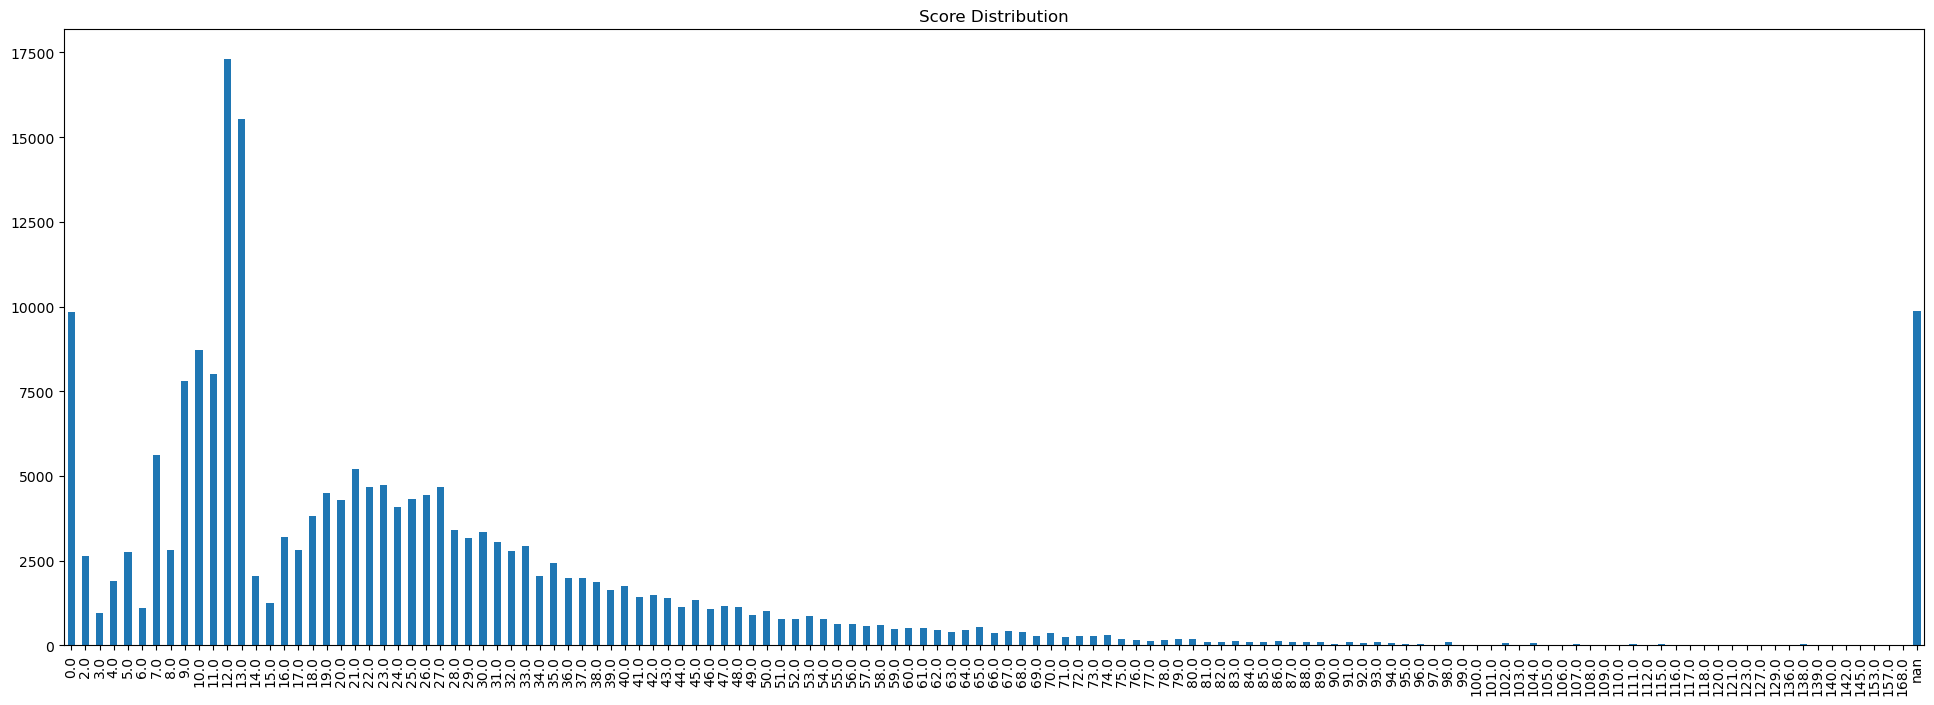

In [12]:
#lets take a peek at the distribution of Scores
isp['Score'].value_counts(dropna=False).sort_index().plot.bar(figsize=(24,8),x='Score',y='Frequency',title='Score Distribution')

<Axes: title={'center': 'Rest Grades'}>

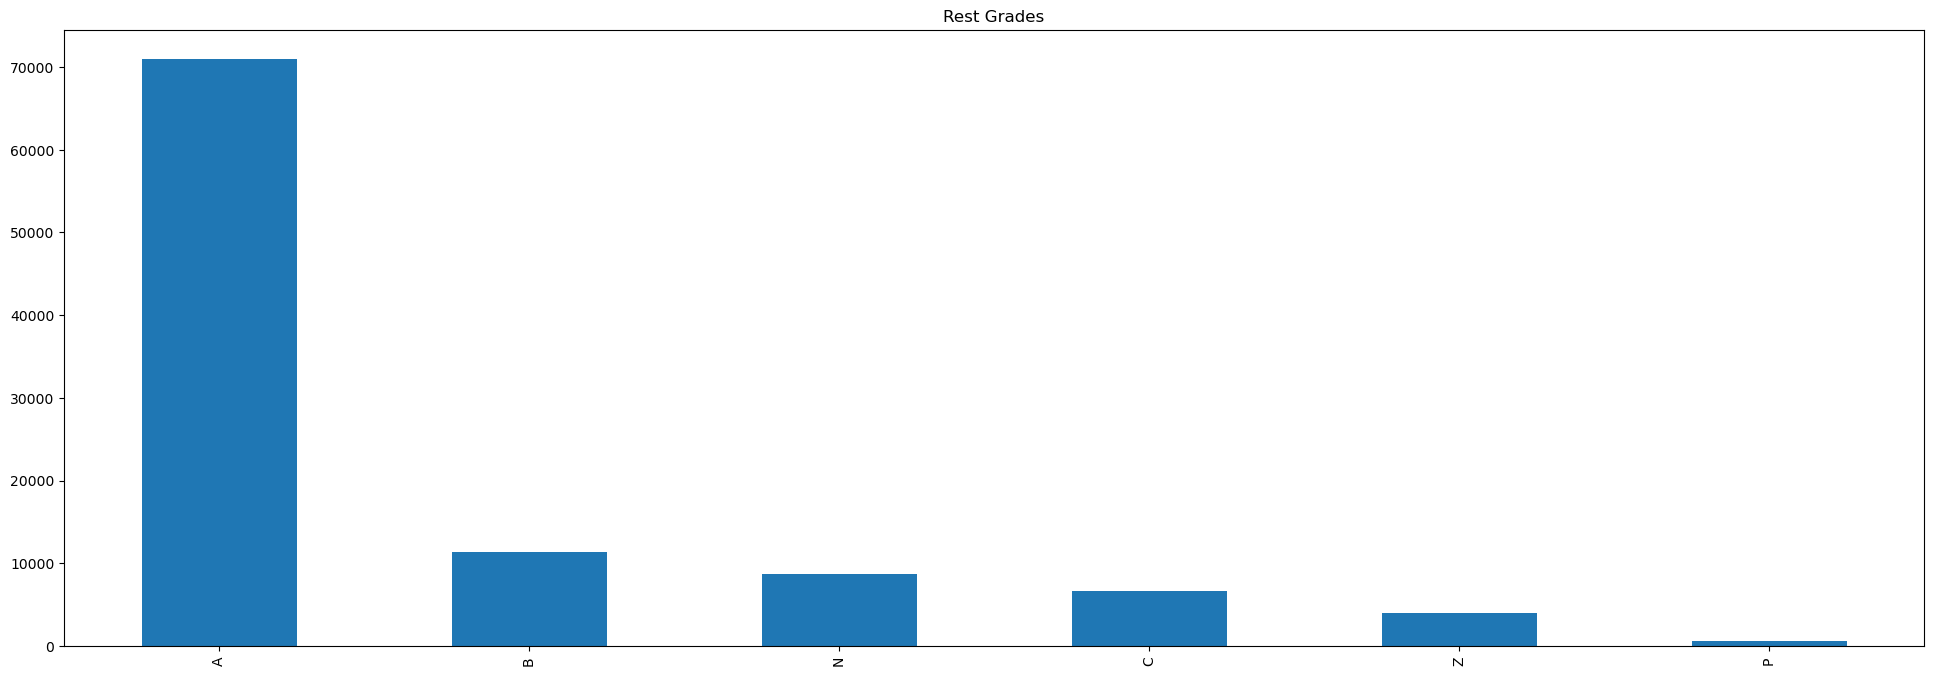

In [13]:
#now let's check grades
isp['Grade'].value_counts(dropna=True).plot.bar(figsize=(24,8),x='Grade',y='Frequency',title='Rest Grades')


In [14]:
# Now let's take a deeper look at Value count, Length, and dtype per Column to form our questions 

for col in isp.columns:
    print(f'Column name: {col}')
    print(isp[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: Camis
40398688    65
41406895    59
50045647    56
40365904    52
50111296    49
            ..
50143196     1
50109098     1
50142808     1
50141673     1
50108967     1
Name: Camis, Length: 28320, dtype: int64
--------------------------------------------------


Column name: Dba
DUNKIN                        2573
SUBWAY                        1510
STARBUCKS                     1172
MCDONALD'S                    1058
KENNEDY FRIED CHICKEN          707
                              ... 
GULAABO                          1
CAFE 58 PIZZERIA AND GRILL       1
THE GLASSHOUSE ROOFTOP           1
SHOO LOONG KAN                   1
264 suydam LLC                   1
Name: Dba, Length: 22111, dtype: int64
--------------------------------------------------


Column name: Boro
Manhattan        77264
Brooklyn         55682
Queens           49870
Bronx            18468
Staten Island     7163
0                   12
Name: Boro, dtype: int64
-----------------------------------------------

## Initial Exploration Questions 

* It seems like there are several columns we can drop including:
- One value for entire data set
1. 'Record_date' 
2. 'Location_point1'
- Not necessary for our analysis
1. 'Phone' 
2. 'Community_board'
- No Value to us since they were not explained in data dict
1. Bin
2. Bbl
3. Nta

* Why are there 112954 NaN for Grade Date?
* Why do Zip Codes have a float on them?
* What is Borough 0? 
* Columns Bbl, Nta, Bin, and Census_tract require further investigation (unsure of what they represent)


### Data Cleaning 

* Renaming 

In [15]:
isp.rename(columns={'Dba': 'Restaurant_name'}, inplace=True)

In [16]:
isp.rename(columns={'Boro': 'Borough'}, inplace= True)

In [17]:
isp.rename(columns={'Camis': 'Record_id'}, inplace=True)

In [18]:
#Check for and drop any duplicate rows
print('length before drop:', len(isp))

isp = isp.drop_duplicates()

print('length after drop:', len(isp))

length before drop: 208459


length after drop: 208453


* Only 6 duplicate rows 


In [19]:
#Replace 01/01/1900 (Proxy used for not yet inspected restaurants) with 00/00/0000 (easier to identify as not a real date)
#old = '01/01/1900'
#new = '00/00/0000'
#isp['Inspection_date'] = isp['Inspection_date'].replace(old,new)

In [20]:
# How many of not yet inspected restaurants do we have? 
isp['Inspection_date'].value_counts()

01/01/1900    2414
04/13/2023     597
03/16/2023     585
02/16/2023     564
04/26/2023     553
              ... 
06/30/2021       1
05/04/2021       1
02/15/2017       1
01/09/2019       1
04/27/2016       1
Name: Inspection_date, Length: 1670, dtype: int64

In [21]:
isp.columns

Index(['Record_id', 'Restaurant_name', 'Borough', 'Building', 'Street',
       'Zipcode', 'Phone', 'Cuisine_description', 'Inspection_date', 'Action',
       'Violation_code', 'Violation_description', 'Critical_flag', 'Score',
       'Grade', 'Grade_date', 'Record_date', 'Inspection_type', 'Latitude',
       'Longitude', 'Community_board', 'Council_district', 'Census_tract',
       'Bin', 'Bbl', 'Nta', 'Location_point1'],
      dtype='object')

In [22]:
drop_cols = ['Location_point1', 'Record_date', 'Nta', 'Community_board', 'Bbl', 'Bin']
isp = isp.drop(drop_cols, axis=1)

In [23]:
isp.head()

,Record_id,Restaurant_name,Borough,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Inspection_type,Latitude,Longitude,Council_district,Census_tract
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,NaN,7186398880,Mexican,09/26/2023,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223.0,7182320055,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.602887,-73.986424,43.0,40400.0
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014.0,9175606080,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.733028,-74.010284,3.0,7500.0
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.770403,-73.919343,22.0,6900.0


In [36]:
isp['Restaurant_name'].describe()

count     207866
unique     22110
top       DUNKIN
freq        2573
Name: Restaurant_name, dtype: object

In [25]:
#check NaN restaurant names
isp['Restaurant_name'].isna().sum()

587

In [26]:
#See what other columns have a NaN if Rest Name is a NaN
#Use a boolean mask where True represents NaN values and apply to DF to get subset of rows which have NaN values
isp[isp['Restaurant_name'].isna()]

,Record_id,Restaurant_name,Borough,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Inspection_type,Latitude,Longitude,Council_district,Census_tract
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.770403,-73.919343,22.0,6900.0
5,50140007,NaN,Manhattan,1154,1 AVENUE,10065.0,9176925975,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.762302,-73.959985,5.0,10602.0
6,50131153,NaN,Queens,13621,ROOSEVELT AVE,11354.0,9299908888,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.759792,-73.829243,20.0,87100.0
10,50143471,NaN,Bronx,812,RIVER AVE,10451.0,6508042797,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.826132,-73.926895,16.0,6300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,50132784,NaN,Bronx,283,SAINT ANNS AVENUE,10454.0,9176881611,Spanish,08/10/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,27.0,N,NaN,Pre-permit (Operational) / Initial Inspection,40.807919,-73.916743,8.0,3900.0
206395,50129735,NaN,Manhattan,1802,65TH STREET TRANSVERVSE,NaN,9172151616,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
206422,50125471,NaN,Brooklyn,228,DUFFIELD STREET,11201.0,9175159593,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.691298,-73.984393,33.0,1500.0
206915,50144191,NaN,Staten Island,2636,HYLAN BOULEVARD,10306.0,3477015000,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,40.567454,-74.112765,50.0,12804.0


In [27]:
#Find all of the NaN restaurant names. These are 587 of them and these are either not inspected or pre-opening inspected. 
isp.loc[isp['Restaurant_name'].isna()] 
# Drop these rows where the restaurant name is NaN
isp = isp.dropna(subset=['Restaurant_name'])


### Notes on Grades Column
* N= Not Yet Graded
* A = Grade A
* B = Grade B
* C = Grade C
* Z = Grade Pending
* P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure

In [37]:
#isp.info()
isp

,Record_id,Restaurant_name,Borough,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Inspection_type,Latitude,Longitude,Council_district,Census_tract
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,0,7186398880,Mexican,2023-09-26,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaT,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223,7182320055,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.602887,-73.986424,43.0,40400.0
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014,9175606080,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.733028,-74.010284,3.0,7500.0
7,50106640,CHEFSCAPE,Manhattan,116,WEST HOUSTON STREET,10012,7032971068,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.727448,-74.000952,3.0,6500.0
8,50138381,LOS MANGOS BAR & GRILL,Bronx,231,BROOK AVENUE,10454,3474795512,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.807449,-73.919301,8.0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208454,50117893,WE JUICING,Queens,16546,BAISLEY BLVD,11434,9177709055,"Juice, Smoothies, Fruit Salads",2023-03-14,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,2.0,NaN,NaT,Pre-permit (Operational) / Compliance Inspection,40.679181,-73.778175,28.0,33402.0
208455,41429791,RASPBERRY DELI & GROCERY,Manhattan,2127,2 AVENUE,10029,2128602615,Sandwiches,2022-03-01,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12.0,A,2022-03-01,Cycle Inspection / Initial Inspection,40.792846,-73.940822,8.0,18000.0
208456,50002491,AGORA TURKISH RESTAURANT,Manhattan,1565,SECOND AVENUE,10028,2127171220,Turkish,2022-03-22,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,0.0,NaN,NaT,Cycle Inspection / Initial Inspection,40.774846,-73.953959,5.0,13800.0
208457,50115895,PAPA'S PIZZA,Brooklyn,187,BEDFORD AVENUE,11211,7187243651,Pizza,2023-10-18,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,39.0,Z,2023-10-18,Cycle Inspection / Re-inspection,40.717675,-73.957876,34.0,55300.0


In [29]:
# Cast Date columns as Dates 
isp['Inspection_date'] = pd.to_datetime(isp['Inspection_date'])

In [30]:
isp['Grade_date'] = pd.to_datetime(isp['Grade_date'])

In [31]:
isp[['Grade_date','Inspection_date']].dtypes

Grade_date         datetime64[ns]
Inspection_date    datetime64[ns]
dtype: object

In [32]:
isp.dtypes

Record_id                         int64
Restaurant_name                  object
Borough                          object
Building                         object
Street                           object
Zipcode                         float64
Phone                            object
Cuisine_description              object
Inspection_date          datetime64[ns]
Action                           object
Violation_code                   object
Violation_description            object
Critical_flag                    object
Score                           float64
Grade                            object
Grade_date               datetime64[ns]
Inspection_type                  object
Latitude                        float64
Longitude                       float64
Council_district                float64
Census_tract                    float64
dtype: object

In [33]:
#turn the zipcodes into int as opposed to float
isp['Zipcode'] = isp['Zipcode'].fillna(0).astype(int)

In [34]:
isp.head()

,Record_id,Restaurant_name,Borough,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Inspection_type,Latitude,Longitude,Council_district,Census_tract
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,0,7186398880,Mexican,2023-09-26,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaT,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223,7182320055,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.602887,-73.986424,43.0,40400.0
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014,9175606080,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.733028,-74.010284,3.0,7500.0
7,50106640,CHEFSCAPE,Manhattan,116,WEST HOUSTON STREET,10012,7032971068,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.727448,-74.000952,3.0,6500.0
8,50138381,LOS MANGOS BAR & GRILL,Bronx,231,BROOK AVENUE,10454,3474795512,NaN,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,NaN,40.807449,-73.919301,8.0,2500.0


In [ ]:
drop_cols2 = ['Latitude', 'Longitude', 'Council_district', 'Census_tract']
isp = isp.drop(drop_cols2, axis=1)

In [35]:
isp.to_csv("Cleaned_Isp.csv",index=False)